## Global

In [148]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
#Import dos arquivos csv
pilotos = pd.read_csv('./bases/drivers.csv') #feito
piloto_classificacoes = pd.read_csv('./bases/driver_standings.csv') #feito
corridas = pd.read_csv('./bases/races.csv') #feito
sprint_resultados = pd.read_csv('./bases/sprint_results.csv') #feito
circuitos = pd.read_csv('./bases/circuits.csv') #feito
tempo_por_volta = pd.read_csv('./bases/lap_times.csv') #feito
parada_boxes = pd.read_csv('./bases/pit_stops.csv') #feito
qualificacao = pd.read_csv('./bases/qualifying.csv') 
resultados = pd.read_csv('./bases/results.csv') #feito
status = pd.read_csv('./bases/status.csv') 
temporadas = pd.read_csv('./bases/seasons.csv') # Não precisa
construtores = pd.read_csv('./bases/constructors.csv') #feito
construtor_classificacoes = pd.read_csv('./bases/constructor_standings.csv') #feito
construtor_resultados = pd.read_csv('./bases/constructor_results.csv') #feito

## Tratamento/Limpeza de dados

Tabelas a serem tratadas, limpas e análisadas serão:
pilotos, pilotos_classificacoes, construtores, construtor_resultados, sprint_resultados, parada_boxes, qualificacao, resultados

### T/L tabela DRIVERS (PILOTOS):

Comentários:

É possível excluir as colunas "número" e "código", mas por hora só observar se ao decorrer do projeto essas colunas se tornam uteis, por isso é melhor optar em manter. Elas podem ser uteis visto que um carro pode ter mais de um piloto, e em questão do "código" ou sigla do piloto pode diferenciar se caso ocorrer de ter duas pessoas ter os mesmos nomes e sobrenomes.

#### Alterações pré-determinadas:

In [150]:
pilotos

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [151]:
#Colocando as colunas em PT_BR
pilotos.columns = ['piloto_id', 'piloto_ref', 'numero', 'codigo', 'nome', 'sobrenome', 'dt_nascimento', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
pilotos = pilotos.drop('url', axis=1)

In [152]:
pilotos

,piloto_id,piloto_ref,numero,codigo,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian


#### Informações sobre as colunas

In [153]:
print("Colunas: ")
pilotos.columns

Colunas: 


Index(['piloto_id', 'piloto_ref', 'numero', 'codigo', 'nome', 'sobrenome',
       'dt_nascimento', 'nacionalidade'],
      dtype='object')

In [154]:
print("Descricao: ")
pilotos.describe()

Descricao: 


,piloto_id
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


In [155]:
print("Informacoes: ")
pilotos.info()
print("\n")


print("Dimensoes: ")
print(pilotos.shape)
print("\n")

print("Head:")
pilotos.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   piloto_id      857 non-null    int64 
 1   piloto_ref     857 non-null    object
 2   numero         857 non-null    object
 3   codigo         857 non-null    object
 4   nome           857 non-null    object
 5   sobrenome      857 non-null    object
 6   dt_nascimento  857 non-null    object
 7   nacionalidade  857 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.7+ KB


Dimensoes: 
(857, 8)


Head:


,piloto_id,piloto_ref,numero,codigo,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [156]:
#retorna o número de valores ausentes para cada coluna.
pilotos.isna().sum()

piloto_id        0
piloto_ref       0
numero           0
codigo           0
nome             0
sobrenome        0
dt_nascimento    0
nacionalidade    0
dtype: int64

#### Alterações de type nas colunas e nulls

In [157]:
#Colocando os valores "\n" COMO None
pilotos = pilotos.replace('\\N', np.nan)
pilotos = pilotos.replace('<NA>', np.nan)

In [158]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
piloto_id: 0
piloto_ref: 0
numero: 0
codigo: 0
nome: 0
sobrenome: 0
dt_nascimento: 0
nacionalidade: 0


In [159]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
piloto_id: 0
piloto_ref: 2
numero: 803
codigo: 757
nome: 2
sobrenome: 1
dt_nascimento: 0
nacionalidade: 0


In [160]:
#Transformando em String
pilotos['piloto_ref'] = pilotos['piloto_ref'].astype(pd.StringDtype())
pilotos['numero'] = pilotos['numero'].astype(pd.StringDtype())
pilotos['codigo'] = pilotos['codigo'].astype(pd.StringDtype())
pilotos['nome'] = pilotos['nome'].astype(pd.StringDtype())
pilotos['sobrenome'] = pilotos['sobrenome'].astype(pd.StringDtype())
pilotos['nacionalidade'] = pilotos['nacionalidade'].astype(pd.StringDtype())

#Transformando em date, pois está em object
pilotos['dt_nascimento'] = pd.to_datetime(pilotos['dt_nascimento'])

### T/L tabela DRIVERS_STANDINGS (PILOTOS_CLASSIFICADOS):

Comentários:

Todas as colunas fazem sentido, algumas colunas mesmo com muito outsiders fazem sentido porque essas estão diretamente ligada a desempenho, devido a isso faz sentido ter muitos outsiders, já que só alguns conseguiram e conseguirão ter bons desempenhos.

#### Alterações pré-determinadas:

In [161]:
piloto_classificacoes

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [162]:
#Colocando as colunas em PT_BR
piloto_classificacoes.columns = ['piloto_classificacao', 'corrida_id', 'piloto_id', 'pontos', 'posicao', 'posicao_texto', 'vitorias']

#### Informações sobre as colunas

In [163]:
print("Colunas: ")
piloto_classificacoes.columns

Colunas: 


Index(['piloto_classificacao', 'corrida_id', 'piloto_id', 'pontos', 'posicao',
       'posicao_texto', 'vitorias'],
      dtype='object')

In [164]:
print("Descricao: ")
piloto_classificacoes.describe()

Descricao: 


,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,vitorias
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [165]:
print("Informacoes: ")
piloto_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(piloto_classificacoes.shape)
print("\n")

print("Head:")
piloto_classificacoes.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   piloto_classificacao  34124 non-null  int64  
 1   corrida_id            34124 non-null  int64  
 2   piloto_id             34124 non-null  int64  
 3   pontos                34124 non-null  float64
 4   posicao               34124 non-null  int64  
 5   posicao_texto         34124 non-null  object 
 6   vitorias              34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


Dimensoes: 
(34124, 7)


Head:


,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [166]:
#retorna o número de valores ausentes para cada coluna.
piloto_classificacoes.isna().sum()

piloto_classificacao    0
corrida_id              0
piloto_id               0
pontos                  0
posicao                 0
posicao_texto           0
vitorias                0
dtype: int64

#### Alterações de type nas colunas e nulls

In [167]:
#Colocando os valores "\n" COMO None
piloto_classificacoes = piloto_classificacoes.replace('\\N', np.nan)

In [168]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in piloto_classificacoes.columns:
    contagem = piloto_classificacoes[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
piloto_classificacao: 0
corrida_id: 0
piloto_id: 0
pontos: 0
posicao: 0
posicao_texto: 0
vitorias: 0


In [169]:
piloto_classificacoes

,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [170]:
#Transformando em String
piloto_classificacoes['posicao_texto'] = piloto_classificacoes['posicao_texto'].astype(pd.StringDtype())

#### Gráfico e Estátisticas

In [171]:
piloto_classificacoes

,piloto_classificacao,corrida_id,piloto_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


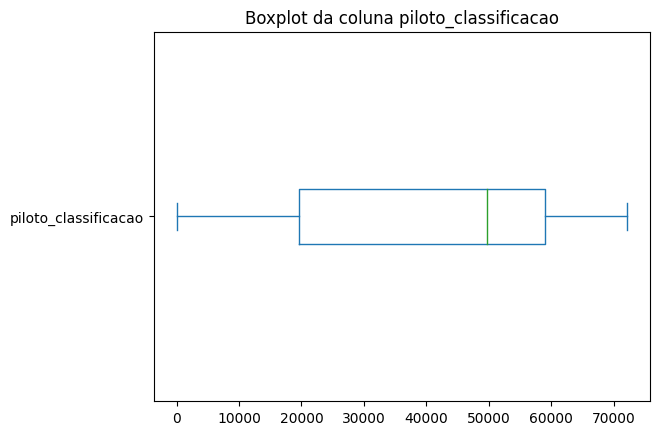

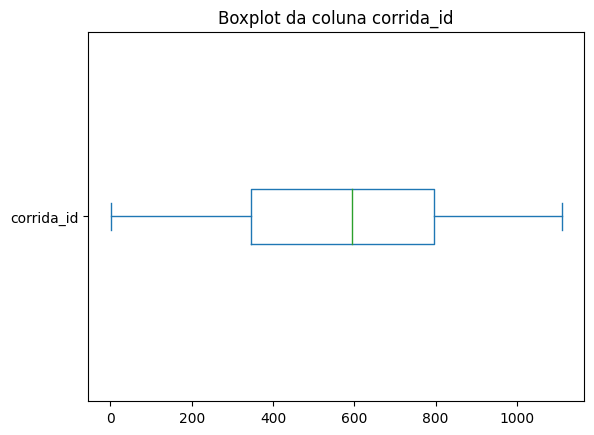

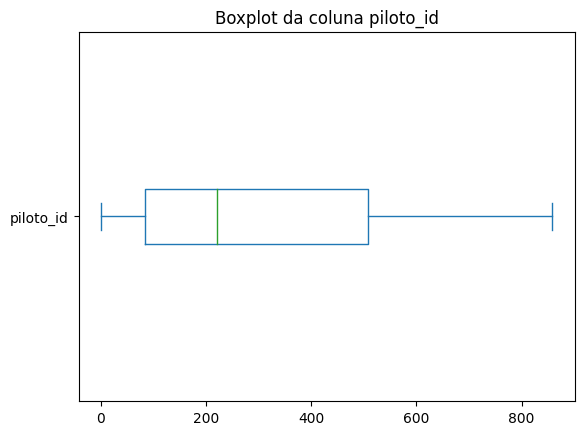

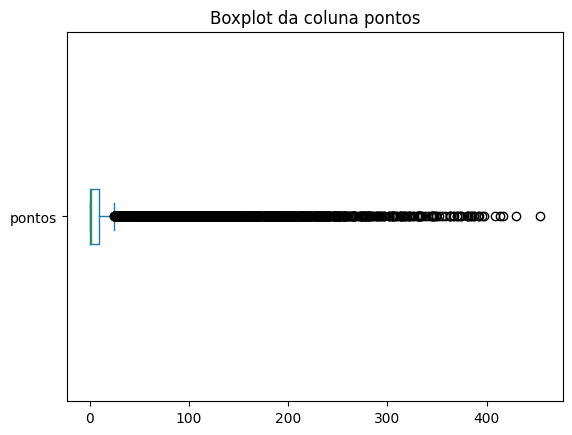

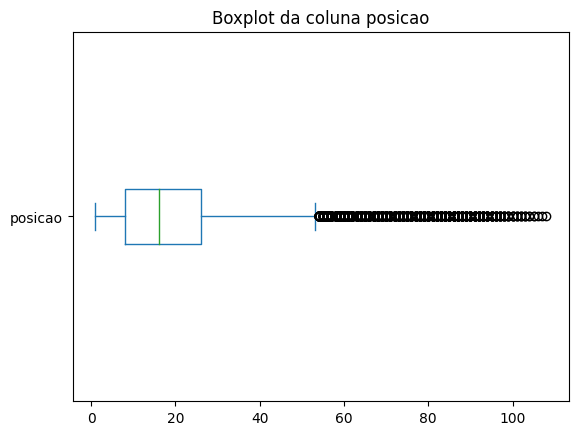

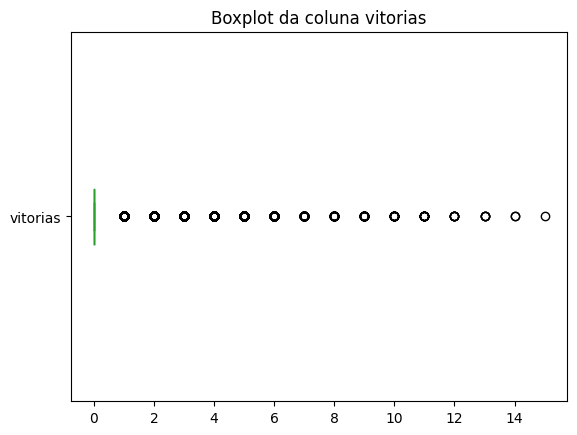

In [172]:
# Crie um boxplot para cada coluna numérica
for coluna in piloto_classificacoes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    piloto_classificacoes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

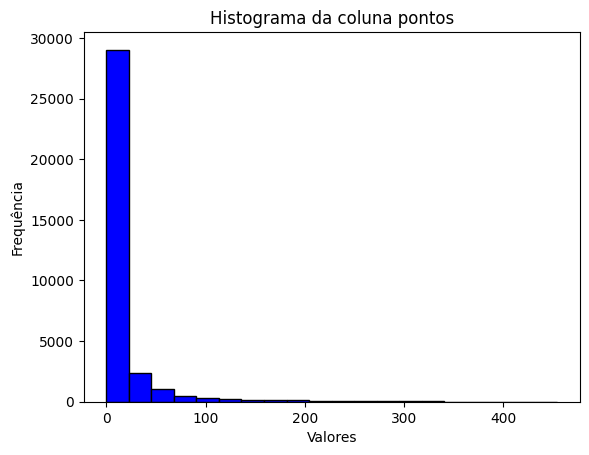

In [173]:
# Criar o histograma
plt.hist(piloto_classificacoes['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna pontos')

# Mostrar o gráfico
plt.show()

In [174]:
print(piloto_classificacoes['pontos'].max())
print(piloto_classificacoes['pontos'].min())

454.0
0.0


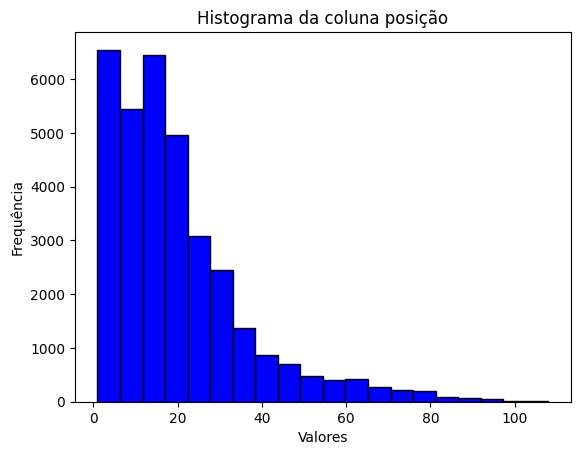

In [175]:
# Criar o histograma
plt.hist(piloto_classificacoes['posicao'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna posição')

# Mostrar o gráfico
plt.show()

In [176]:
print(piloto_classificacoes['posicao'].max())
print(piloto_classificacoes['posicao'].min())

108
1


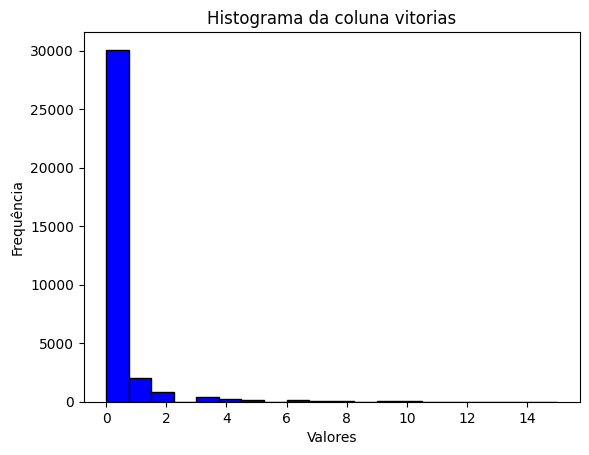

In [177]:
# Criar o histograma
plt.hist(piloto_classificacoes['vitorias'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [178]:
print(piloto_classificacoes['vitorias'].max())
print(piloto_classificacoes['vitorias'].min())

15
0


### T/L tabela CONSTRUCTORS (CONSTRUTORES):

Coméntarios:
Tabela clean, só precisou derrubar o url e arrumar o types das tabelas

#### Alterações pré-determinadas:

In [179]:
construtores

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [180]:
#Colocando as colunas em PT_BR
construtores.columns = ['construtor_id', 'construtor_ref', 'nome', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
construtores = construtores.drop('url', axis=1)

In [181]:
construtores

,construtor_id,construtor_ref,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


#### Informações sobre as colunas

In [182]:
print("Colunas: ")
construtores.columns

Colunas: 


Index(['construtor_id', 'construtor_ref', 'nome', 'nacionalidade'], dtype='object')

In [183]:
print("Descricao: ")
construtores.describe()

Descricao: 


,construtor_id
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [184]:
print("Informacoes: ")
construtores.info()
print("\n")


print("Dimensoes: ")
print(construtores.shape)
print("\n")

print("Head:")
construtores.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   construtor_id   211 non-null    int64 
 1   construtor_ref  211 non-null    object
 2   nome            211 non-null    object
 3   nacionalidade   211 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


Dimensoes: 
(211, 4)


Head:


,construtor_id,construtor_ref,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [185]:
#retorna o número de valores ausentes para cada coluna.
construtores.isna().sum()

construtor_id     0
construtor_ref    0
nome              0
nacionalidade     0
dtype: int64

#### Alterações de type nas colunas e nulls

In [186]:
#Colocando os valores "\n" COMO None
construtores = construtores.replace('\\N', np.nan)

In [187]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtores.columns:
    contagem = construtores[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtor_id: 0
construtor_ref: 0
nome: 0
nacionalidade: 0


In [188]:
#Transformando em String
construtores['construtor_ref'] = construtores['construtor_ref'].astype(pd.StringDtype())
construtores['nome'] = construtores['nome'].astype(pd.StringDtype())
construtores['nacionalidade'] = construtores['nacionalidade'].astype(pd.StringDtype())

In [189]:
construtores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   construtor_id   211 non-null    int64 
 1   construtor_ref  211 non-null    string
 2   nome            211 non-null    string
 3   nacionalidade   211 non-null    string
dtypes: int64(1), string(3)
memory usage: 6.7 KB


### T/L tabela CONSTRUCTORS_RESULTS (CONSTRUCTORS_RESULTS):

coméntarios:
As colunas fazem sentido, porém a coluna status possuí quase 100% de 'nan' que seria nulos. A minha hipotesé é que o convencional é o /n que é nulo, e só em algumas situações terá um valor diferente, como o D que possívelmente é para 'disqualified'. Devido a isso eu resolvi manter mesmo que seja quase uma coluna totalmente descartavel.

#### Alterações pré-determinadas:

In [190]:
construtor_resultados

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [191]:
construtor_resultados.columns = ['construtores_resultados_id','race_id', 'construtores_id', 'pontos', 'status']

In [192]:
construtor_resultados

,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


#### Informações sobre as colunas

In [193]:
print("Colunas: ")
construtor_resultados.columns

Colunas: 


Index(['construtores_resultados_id', 'race_id', 'construtores_id', 'pontos',
       'status'],
      dtype='object')

In [194]:
print("Descricao: ")
construtor_resultados.describe()

Descricao: 


,construtores_resultados_id,race_id,construtores_id,pontos
count,12290.000000,12290.000000,12290.000000,12290.000000
mean,8191.007242,511.762815,44.661676,3.859967
std,5561.388146,302.677952,57.851043,7.555135
min,1.000000,1.000000,1.000000,0.000000
25%,3073.250000,281.000000,6.000000,0.000000
50%,6145.500000,477.000000,22.000000,0.000000
75%,13698.750000,722.000000,53.000000,4.000000
max,16789.000000,1110.000000,214.000000,66.000000


In [195]:
print("Informacoes: ")
construtor_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtor_resultados.shape)
print("\n")

print("Head:")
construtor_resultados.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   construtores_resultados_id  12290 non-null  int64  
 1   race_id                     12290 non-null  int64  
 2   construtores_id             12290 non-null  int64  
 3   pontos                      12290 non-null  float64
 4   status                      12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


Dimensoes: 
(12290, 5)


Head:


,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [196]:
#retorna o número de valores ausentes para cada coluna.
construtor_resultados.isna().sum()

construtores_resultados_id    0
race_id                       0
construtores_id               0
pontos                        0
status                        0
dtype: int64

#### Alterações de type nas colunas e nulls

In [197]:
construtor_resultados

,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


In [198]:
#Colocando os valores "\n" COMO None
construtor_resultados = construtor_resultados.replace('\\N', np.nan)

In [199]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtor_resultados.columns:
    contagem = construtor_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtores_resultados_id: 0
race_id: 0
construtores_id: 0
pontos: 0
status: 0


In [200]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtor_resultados.columns:
    contagem = construtor_resultados[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
construtores_resultados_id: 0
race_id: 0
construtores_id: 0
pontos: 0
status: 12273


In [201]:
construtor_resultados.shape

(12290, 5)

In [202]:
#quantidade de nulls
valores_nulos = construtor_resultados['status'].isna()

# Calcule a porcentagem de valores nulos
porcentagem_nulos = (valores_nulos.sum() / len(construtor_resultados['status'])) * 100

print('Porcentagem de valores nulos na coluna:', porcentagem_nulos)

Porcentagem de valores nulos na coluna: 99.86167615947925


In [203]:
#Transformando em String
construtor_resultados['status'] = construtor_resultados['status'].astype(pd.StringDtype())

#### Gráfico e Estátisticas

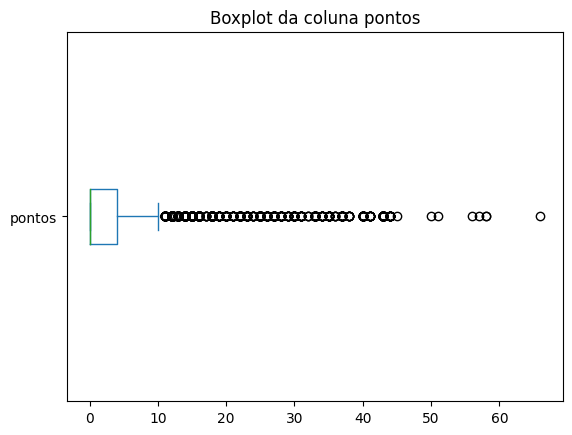

In [204]:
plt.figure()  # Crie uma nova figura para cada boxplot
construtor_resultados['pontos'].plot(kind='box', vert=False)
plt.title(f'Boxplot da coluna pontos')

# Exiba os boxplots
plt.show()

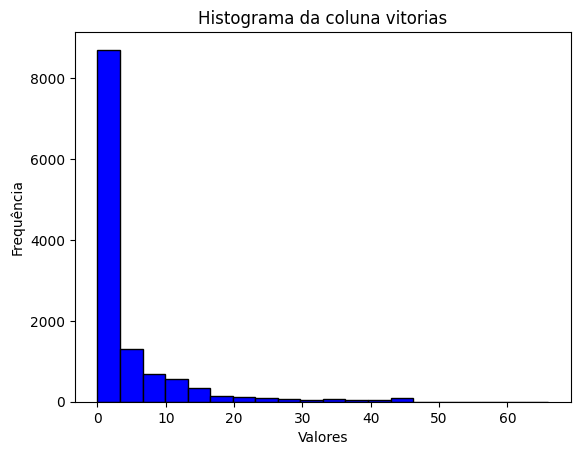

In [205]:
# Criar o histograma
plt.hist(construtor_resultados['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [206]:
print(construtor_resultados['pontos'].max())
print(construtor_resultados['pontos'].min())

66.0
0.0


### T/L tabela SPRINT_RESULTS (SPRINT_RESULTADOS):

Coméntarios:
Dificuldade para alterar para time, int
Tabela no geral limpa, possuí alguns nulls

#### Alterações pré-determinadas

In [207]:
sprint_resultados

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


In [208]:
#Colocando as colunas em PT_BR
sprint_resultados.columns = ['resultado_id', 'race_id', 'piloto_id', 'constructor_id', 'numero', 'gride', 'posicao', 'posicao_texto', 'posicao_ordem', 'pontos', 'voltas', 'tempo', 'milisegundos', 'volta_rapida', 'volta_rapida_tempo', 'status_id']

In [209]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


#### Informações sobre as colunas

In [210]:
print("Colunas: ")
sprint_resultados.columns

Colunas: 


Index(['resultado_id', 'race_id', 'piloto_id', 'constructor_id', 'numero',
       'gride', 'posicao', 'posicao_texto', 'posicao_ordem', 'pontos',
       'voltas', 'tempo', 'milisegundos', 'volta_rapida', 'volta_rapida_tempo',
       'status_id'],
      dtype='object')

In [211]:
print("Descricao: ")
sprint_resultados.describe()

Descricao: 


,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao_ordem,pontos,voltas,status_id
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,90.500000,1085.666667,714.088889,95.500000,27.550000,10.100000,10.500000,1.300000,19.216667,3.983333
std,52.105662,17.362388,298.112841,88.359632,24.273874,5.861626,5.782366,2.318013,5.469341,17.662091
min,1.000000,1061.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,45.750000,1071.000000,817.000000,6.000000,10.000000,5.000000,5.750000,0.000000,17.000000,1.000000
50%,90.500000,1084.000000,840.000000,84.000000,20.000000,10.000000,10.500000,0.000000,21.000000,1.000000
75%,135.250000,1101.000000,847.000000,210.000000,44.000000,15.000000,15.250000,2.000000,24.000000,1.000000
max,180.000000,1110.000000,858.000000,214.000000,99.000000,20.000000,20.000000,8.000000,24.000000,130.000000


In [212]:
print("Informacoes: ")
sprint_resultados.info()
print("\n")


print("Dimensoes: ")
print(sprint_resultados.shape)
print("\n")

print("Head:")
sprint_resultados.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   resultado_id        180 non-null    int64 
 1   race_id             180 non-null    int64 
 2   piloto_id           180 non-null    int64 
 3   constructor_id      180 non-null    int64 
 4   numero              180 non-null    int64 
 5   gride               180 non-null    int64 
 6   posicao             180 non-null    object
 7   posicao_texto       180 non-null    object
 8   posicao_ordem       180 non-null    int64 
 9   pontos              180 non-null    int64 
 10  voltas              180 non-null    int64 
 11  tempo               180 non-null    object
 12  milisegundos        180 non-null    object
 13  volta_rapida        180 non-null    object
 14  volta_rapida_tempo  180 non-null    object
 15  status_id           180 non-null    int64 
dtypes: int64(10)

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [213]:
#retorna o número de valores ausentes para cada coluna.
sprint_resultados.isna().sum()

resultado_id          0
race_id               0
piloto_id             0
constructor_id        0
numero                0
gride                 0
posicao               0
posicao_texto         0
posicao_ordem         0
pontos                0
voltas                0
tempo                 0
milisegundos          0
volta_rapida          0
volta_rapida_tempo    0
status_id             0
dtype: int64

#### Alterações de type nas colunas e nulls (Não foi possível fazer algumas conversões de type)

In [214]:
#Colocando os valores "\n" COMO None
sprint_resultados = sprint_resultados.replace('\\N' , np.nan)

In [215]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,NaN,NaN,2,2:02.516,130


In [216]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in sprint_resultados.columns:
    contagem = sprint_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
resultado_id: 0
race_id: 0
piloto_id: 0
constructor_id: 0
numero: 0
gride: 0
posicao: 0
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 0
milisegundos: 0
volta_rapida: 0
volta_rapida_tempo: 0
status_id: 0


In [217]:
# Calcular a porcentagem de valores nulos para cada coluna
porcentagens_nulos = sprint_resultados.isna().mean() * 100

print('Porcentagem de valores nulos em cada coluna:')
print(porcentagens_nulos)

Porcentagem de valores nulos em cada coluna:
resultado_id          0.000000
race_id               0.000000
piloto_id             0.000000
constructor_id        0.000000
numero                0.000000
gride                 0.000000
posicao               5.000000
posicao_texto         0.000000
posicao_ordem         0.000000
pontos                0.000000
voltas                0.000000
tempo                 5.555556
milisegundos          5.555556
volta_rapida          3.333333
volta_rapida_tempo    3.333333
status_id             0.000000
dtype: float64


In [218]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,NaN,NaN,2,2:02.516,130


In [219]:
sprint_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   resultado_id        180 non-null    int64 
 1   race_id             180 non-null    int64 
 2   piloto_id           180 non-null    int64 
 3   constructor_id      180 non-null    int64 
 4   numero              180 non-null    int64 
 5   gride               180 non-null    int64 
 6   posicao             171 non-null    object
 7   posicao_texto       180 non-null    object
 8   posicao_ordem       180 non-null    int64 
 9   pontos              180 non-null    int64 
 10  voltas              180 non-null    int64 
 11  tempo               170 non-null    object
 12  milisegundos        170 non-null    object
 13  volta_rapida        174 non-null    object
 14  volta_rapida_tempo  174 non-null    object
 15  status_id           180 non-null    int64 
dtypes: int64(10), object(6)
me

In [220]:
#Transformando em float (o int não está funcionando)
sprint_resultados['posicao'] = pd.to_numeric(sprint_resultados['posicao'], errors='coerce')
sprint_resultados['volta_rapida'] = pd.to_numeric(sprint_resultados['volta_rapida'], errors='coerce')

#Transformando em String
sprint_resultados['posicao_texto'] = sprint_resultados['posicao_texto'].astype(pd.StringDtype())

#Transformando em String porque está inviavel transformar em time em str porque está complicado transformar em time:
sprint_resultados['tempo'] = sprint_resultados['tempo'].astype(pd.StringDtype())
sprint_resultados['posicao_texto'] = sprint_resultados['posicao_texto'].astype(pd.StringDtype())
sprint_resultados['milisegundos'] = sprint_resultados['milisegundos'].astype(pd.StringDtype()) #Problema para converter para time


In [221]:
sprint_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultado_id        180 non-null    int64  
 1   race_id             180 non-null    int64  
 2   piloto_id           180 non-null    int64  
 3   constructor_id      180 non-null    int64  
 4   numero              180 non-null    int64  
 5   gride               180 non-null    int64  
 6   posicao             171 non-null    float64
 7   posicao_texto       180 non-null    string 
 8   posicao_ordem       180 non-null    int64  
 9   pontos              180 non-null    int64  
 10  voltas              180 non-null    int64  
 11  tempo               170 non-null    string 
 12  milisegundos        170 non-null    string 
 13  volta_rapida        174 non-null    float64
 14  volta_rapida_tempo  174 non-null    object 
 15  status_id           180 non-null    int64  
dtypes: float

In [222]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1:30.013,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,1:29.937,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,1:29.958,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,1:30.163,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,2:03.482,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,2:03.472,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,2:02.516,130


#### Gráfico e Estátisticas

In [223]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1:30.013,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,1:29.937,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,1:29.958,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,1:30.163,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,2:03.482,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,2:03.472,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,2:02.516,130


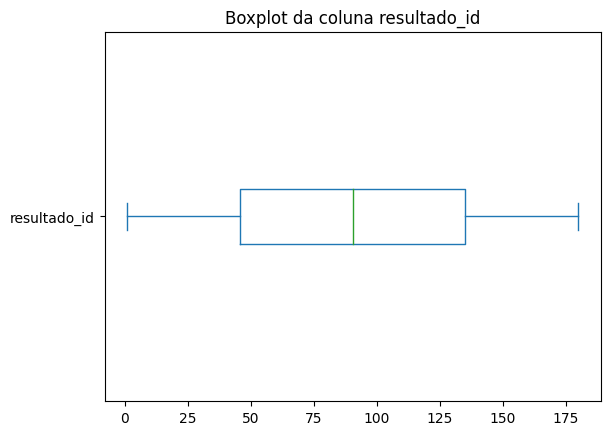

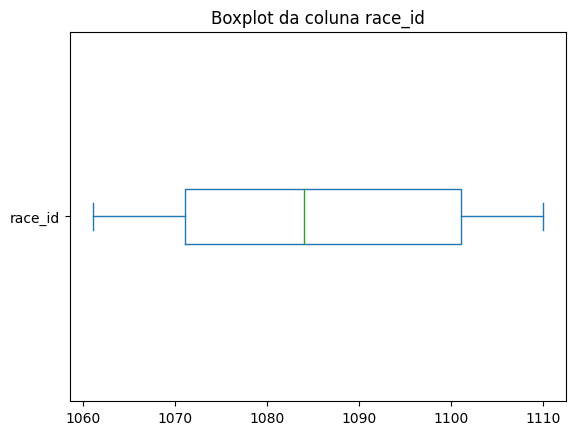

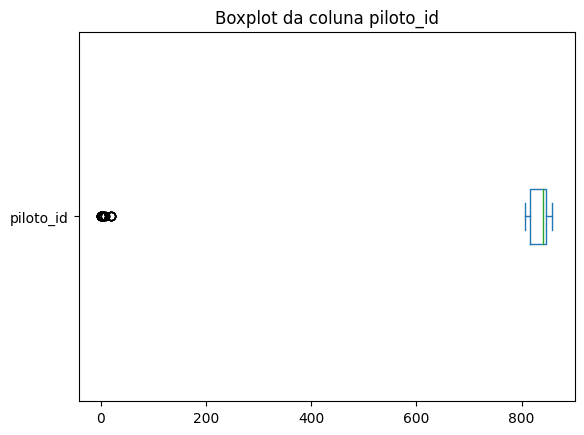

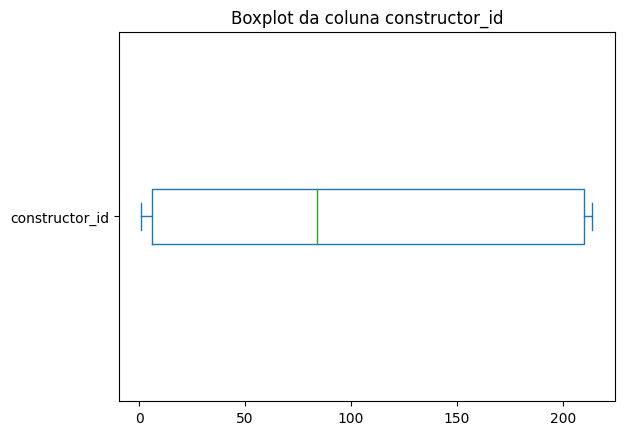

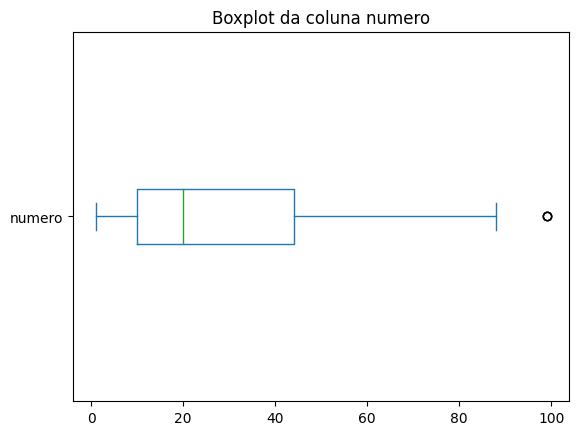

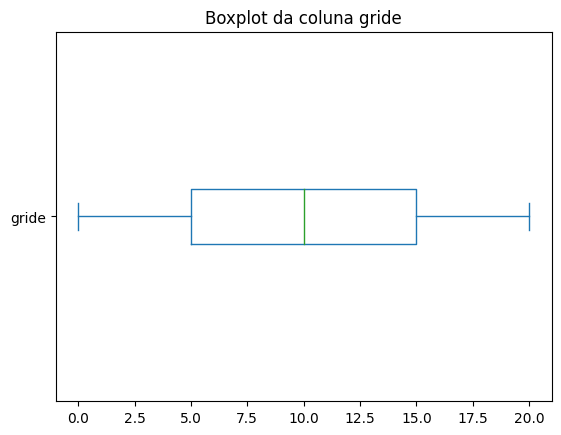

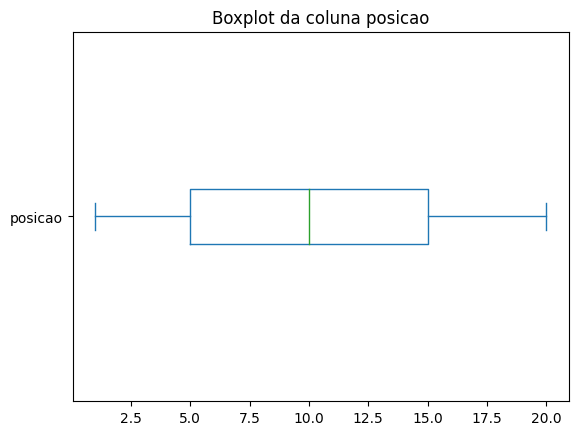

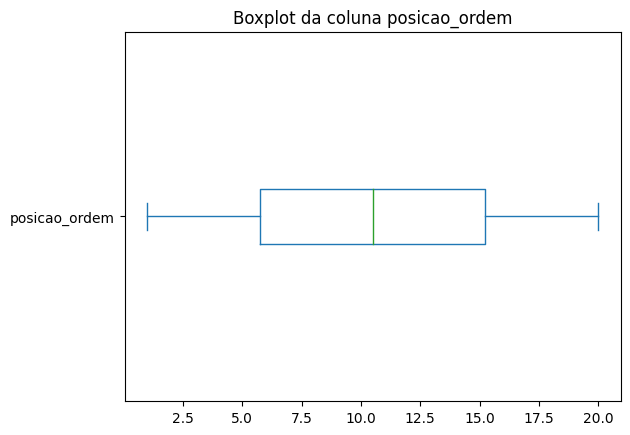

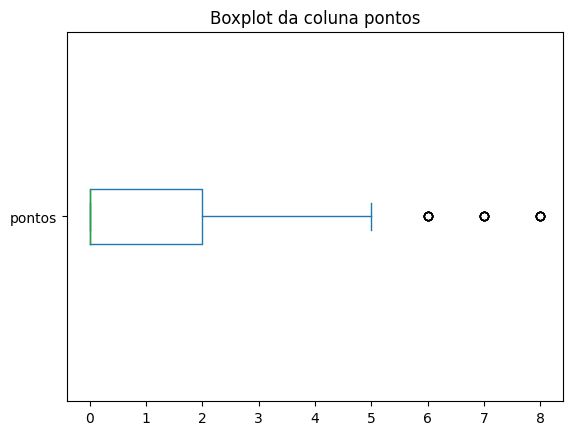

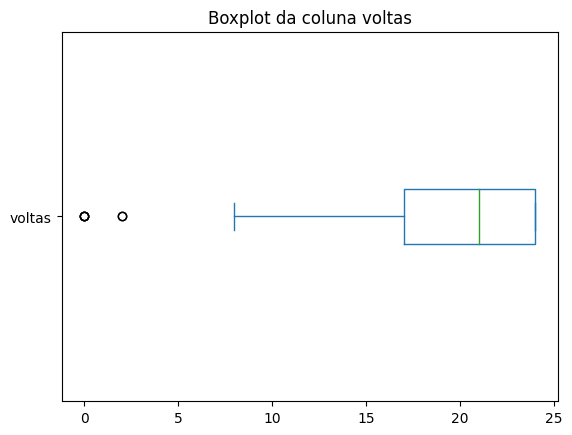

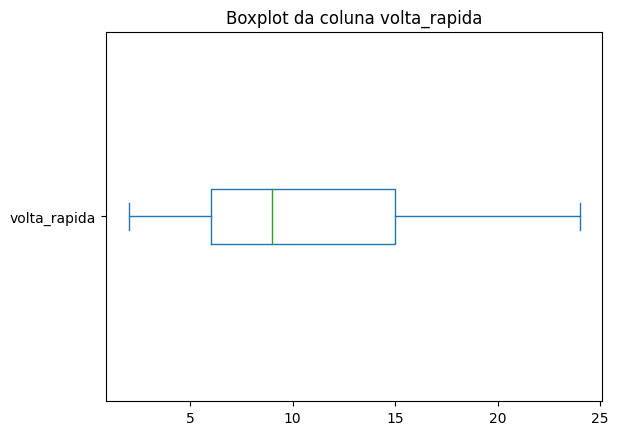

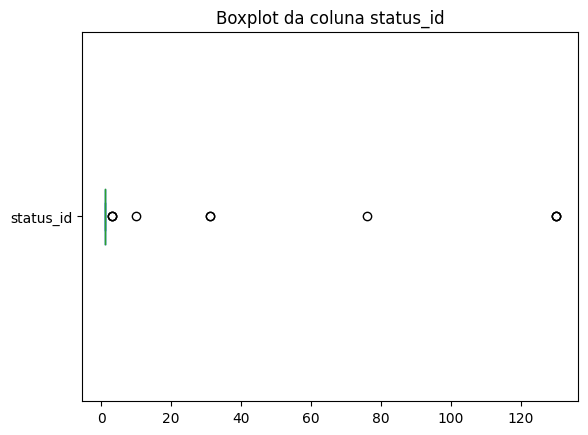

In [224]:
# Crie um boxplot para cada coluna numérica
for coluna in sprint_resultados.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    sprint_resultados[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

In [225]:
sprint_resultados

,resultado_id,race_id,piloto_id,constructor_id,numero,gride,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,volta_rapida_tempo,status_id
0,1,1061,830,9,33,2,1.0,1,1,3,17,25:38.426,1538426,14.0,1:30.013,1
1,2,1061,1,131,44,1,2.0,2,2,2,17,+1.430,1539856,17.0,1:29.937,1
2,3,1061,822,131,77,3,3.0,3,3,1,17,+7.502,1545928,17.0,1:29.958,1
3,4,1061,844,6,16,4,4.0,4,4,0,17,+11.278,1549704,16.0,1:30.163,1
4,5,1061,846,1,4,6,5.0,5,5,0,17,+24.111,1562537,16.0,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16.0,16,16,0,11,+37.571,1536004,6.0,2:03.482,1
176,177,1110,807,210,27,20,17.0,17,17,0,11,+37.827,1536260,6.0,2:03.472,1
177,178,1110,852,213,22,16,18.0,18,18,0,11,+39.267,1537700,7.0,2:02.080,1
178,179,1110,815,9,11,8,NaN,R,19,0,8,<NA>,<NA>,2.0,2:02.516,130


### T/L tabela parada_boxes (PIT_STOPS):

Coméntarios: Tabela tranquila, só a questão dos types novamente.

#### Alterações pré-determinadas

In [226]:
parada_boxes

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


In [227]:
parada_boxes.columns = ['corrida_id', 'piloto_id', 'parada', 'volta', 'tempo', 'duracao', 'milisegundos']

In [228]:
parada_boxes

,corrida_id,piloto_id,parada,volta,tempo,duracao,milisegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


#### Informações sobre as colunas

In [229]:
print("Colunas: ")
parada_boxes.columns

Colunas: 


Index(['corrida_id', 'piloto_id', 'parada', 'volta', 'tempo', 'duracao',
       'milisegundos'],
      dtype='object')

In [230]:
print("Descricao: ")
parada_boxes.describe()

Descricao: 


,corrida_id,piloto_id,parada,volta,milisegundos
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [231]:
print("Informacoes: ")
parada_boxes.info()
print("\n")


print("Dimensoes: ")
print(parada_boxes.shape)
print("\n")

print("Head:")
parada_boxes.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   corrida_id    10089 non-null  int64 
 1   piloto_id     10089 non-null  int64 
 2   parada        10089 non-null  int64 
 3   volta         10089 non-null  int64 
 4   tempo         10089 non-null  object
 5   duracao       10089 non-null  object
 6   milisegundos  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


Dimensoes: 
(10089, 7)


Head:


,corrida_id,piloto_id,parada,volta,tempo,duracao,milisegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [232]:
#retorna o número de valores ausentes para cada coluna.
parada_boxes.isna().sum()

corrida_id      0
piloto_id       0
parada          0
volta           0
tempo           0
duracao         0
milisegundos    0
dtype: int64

#### Alterações de type nas colunas e nulls 

In [233]:
#Colocando os valores "\n" COMO None
parada_boxes = parada_boxes.replace('\\N' , np.nan)

In [234]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in parada_boxes.columns:
    contagem = parada_boxes[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
corrida_id: 0
piloto_id: 0
parada: 0
volta: 0
tempo: 0
duracao: 0
milisegundos: 0


In [235]:
# Calcular a porcentagem de valores nulos para cada coluna
porcentagens_nulos = parada_boxes.isna().mean() * 100

print('Porcentagem de valores nulos em cada coluna:')
print(porcentagens_nulos)

Porcentagem de valores nulos em cada coluna:
corrida_id      0.0
piloto_id       0.0
parada          0.0
volta           0.0
tempo           0.0
duracao         0.0
milisegundos    0.0
dtype: float64


In [236]:
parada_boxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   corrida_id    10089 non-null  int64 
 1   piloto_id     10089 non-null  int64 
 2   parada        10089 non-null  int64 
 3   volta         10089 non-null  int64 
 4   tempo         10089 non-null  object
 5   duracao       10089 non-null  object
 6   milisegundos  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


In [237]:
#Transformando em String porque está inviavel transformar em time em str porque está complicado transformar em time:
parada_boxes['tempo'] = parada_boxes['tempo'].astype(pd.StringDtype())
parada_boxes['duracao'] = parada_boxes['duracao'].astype(pd.StringDtype())

In [238]:
parada_boxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   corrida_id    10089 non-null  int64 
 1   piloto_id     10089 non-null  int64 
 2   parada        10089 non-null  int64 
 3   volta         10089 non-null  int64 
 4   tempo         10089 non-null  string
 5   duracao       10089 non-null  string
 6   milisegundos  10089 non-null  int64 
dtypes: int64(5), string(2)
memory usage: 551.9 KB


#### Gráfico e Estátisticas

In [239]:
parada_boxes

,corrida_id,piloto_id,parada,volta,tempo,duracao,milisegundos
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


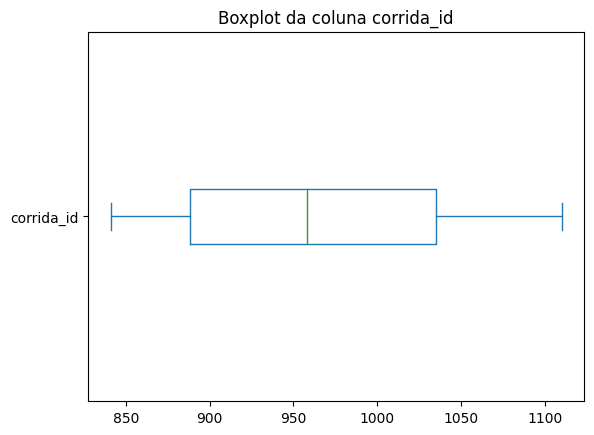

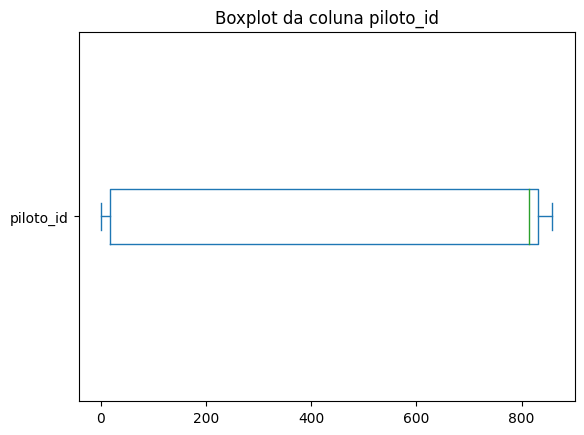

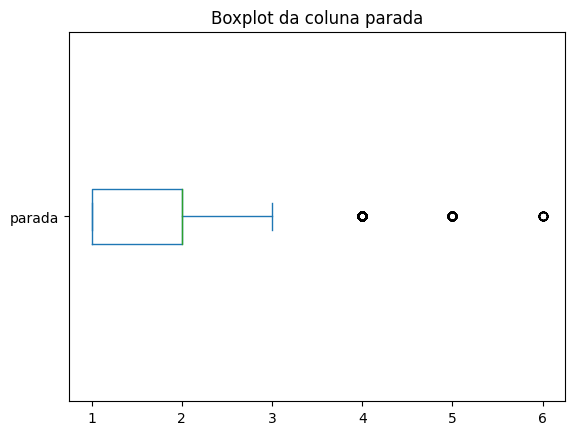

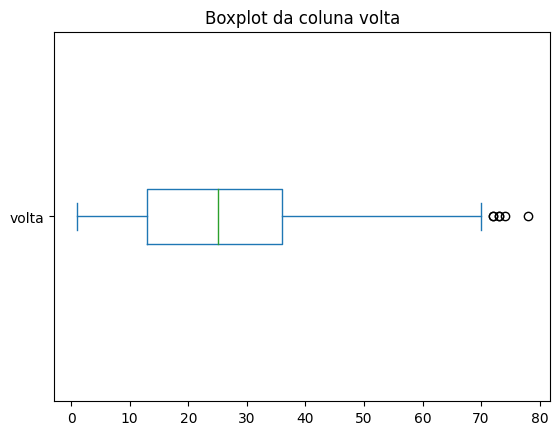

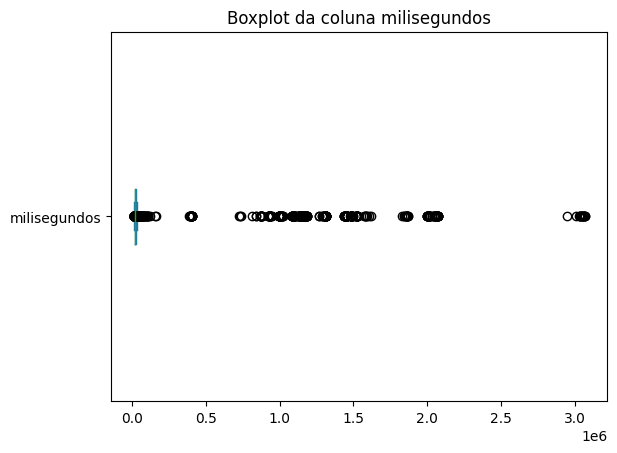

In [240]:
# Crie um boxplot para cada coluna numérica
for coluna in parada_boxes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    parada_boxes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

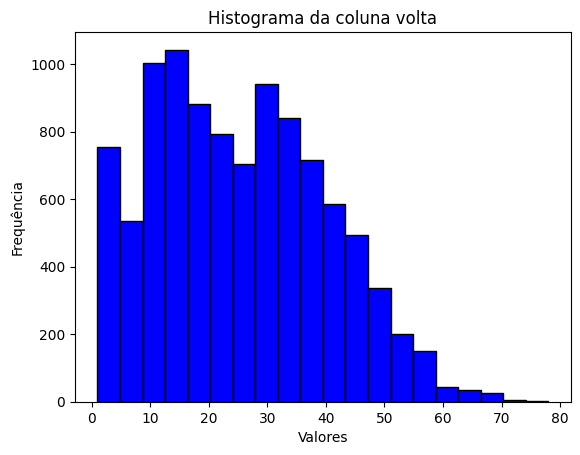

In [241]:
plt.hist(parada_boxes['volta'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna volta')

# Mostrar o gráfico
plt.show()

In [242]:
print(parada_boxes['volta'].max())
print(parada_boxes['volta'].min())

78
1


### T/L TABELA RESULTS (RESULTADOS):

Comentários:
As coluna 'posicao' possui muito nulls, acredito seja para se referir aos pilotos desclassificados. Já as colunas de 'tempo' a 'volta_mais_rapida_velocidade' possuem muitos nulls por conta propria.

#### Alterações pré-determinadas

In [243]:
resultados

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [244]:
resultados.columns = ['result_id', 'corridas_id', 'piloto_id', 'construtor_id', 'numero', 'grid', 'posicao', 'posicao_texto', 'posicao_ordem', 'pontos', 'voltas', 'tempo', 'milisegundos', 'volta_rapida', 'rank', 'volta_rapida_tempo', 'volta_rapida_velocidade', 'status_id']

In [245]:
resultados

,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


#### Informações sobre as colunas

In [246]:
print("Colunas: ")
resultados.columns

Colunas: 


Index(['result_id', 'corridas_id', 'piloto_id', 'construtor_id', 'numero',
       'grid', 'posicao', 'posicao_texto', 'posicao_ordem', 'pontos', 'voltas',
       'tempo', 'milisegundos', 'volta_rapida', 'rank', 'volta_rapida_tempo',
       'volta_rapida_velocidade', 'status_id'],
      dtype='object')

In [247]:
print("Descricao: ")
resultados.describe()

Descricao: 


,result_id,corridas_id,piloto_id,construtor_id,grid,posicao_ordem,pontos,voltas,status_id
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [248]:
print("Informacoes: ")
resultados.info()
print("\n")

print("Dimensoes: ")
print(resultados.shape)
print("\n")

print("Head:")
resultados.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   result_id                26080 non-null  int64  
 1   corridas_id              26080 non-null  int64  
 2   piloto_id                26080 non-null  int64  
 3   construtor_id            26080 non-null  int64  
 4   numero                   26080 non-null  object 
 5   grid                     26080 non-null  int64  
 6   posicao                  26080 non-null  object 
 7   posicao_texto            26080 non-null  object 
 8   posicao_ordem            26080 non-null  int64  
 9   pontos                   26080 non-null  float64
 10  voltas                   26080 non-null  int64  
 11  tempo                    26080 non-null  object 
 12  milisegundos             26080 non-null  object 
 13  volta_rapida             26080 non-null  object 
 14  rank    

,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


#### Alterações de type nas colunas e nulls

In [249]:
resultados

,result_id,corridas_id,piloto_id,construtor_id,numero,grid,posicao,posicao_texto,posicao_ordem,pontos,voltas,tempo,milisegundos,volta_rapida,rank,volta_rapida_tempo,volta_rapida_velocidade,status_id
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [250]:
#Colocando os valores "\n" COMO None
resultados = resultados.replace('\\N' , np.nan)

In [251]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "<NA>" por coluna
for coluna in resultados.columns:
    contagem = resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
result_id: 0
corridas_id: 0
piloto_id: 0
construtor_id: 0
numero: 0
grid: 0
posicao: 0
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 0
milisegundos: 0
volta_rapida: 0
rank: 0
volta_rapida_tempo: 0
volta_rapida_velocidade: 0
status_id: 0


In [252]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in resultados.columns:
    contagem = resultados[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de nan por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
result_id: 0
corridas_id: 0
piloto_id: 0
construtor_id: 0
numero: 6
grid: 0
posicao: 10873
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 18829
milisegundos: 18830
volta_rapida: 18465
rank: 18249
volta_rapida_tempo: 18465
volta_rapida_velocidade: 18465
status_id: 0


In [253]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   result_id                26080 non-null  int64  
 1   corridas_id              26080 non-null  int64  
 2   piloto_id                26080 non-null  int64  
 3   construtor_id            26080 non-null  int64  
 4   numero                   26074 non-null  object 
 5   grid                     26080 non-null  int64  
 6   posicao                  15207 non-null  object 
 7   posicao_texto            26080 non-null  object 
 8   posicao_ordem            26080 non-null  int64  
 9   pontos                   26080 non-null  float64
 10  voltas                   26080 non-null  int64  
 11  tempo                    7251 non-null   object 
 12  milisegundos             7250 non-null   object 
 13  volta_rapida             7615 non-null   object 
 14  rank                  

In [254]:
#Transformando em float (o int não está funcionando)
resultados['numero'] = pd.to_numeric(resultados['numero'], errors='coerce')
resultados['rank'] = pd.to_numeric(resultados['rank'], errors='coerce')

#Transformando em String
resultados['posicao_texto'] = resultados['posicao_texto'].astype(pd.StringDtype())

#Transformando em String porque está inviavel transformar em time em str porque está complicado transformar em time:
resultados['tempo'] = resultados['tempo'].astype(pd.StringDtype())
resultados['posicao'] = resultados['posicao'].astype(pd.StringDtype())
resultados['milisegundos'] = resultados['milisegundos'].astype(pd.StringDtype()) #Problema para converter para time
resultados['volta_rapida'] = resultados['volta_rapida'].astype(pd.StringDtype())
resultados['volta_rapida_tempo'] = resultados['volta_rapida_tempo'].astype(pd.StringDtype())
resultados['volta_rapida_velocidade'] = resultados['volta_rapida_velocidade'].astype(pd.StringDtype())

In [255]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   result_id                26080 non-null  int64  
 1   corridas_id              26080 non-null  int64  
 2   piloto_id                26080 non-null  int64  
 3   construtor_id            26080 non-null  int64  
 4   numero                   26074 non-null  float64
 5   grid                     26080 non-null  int64  
 6   posicao                  15207 non-null  string 
 7   posicao_texto            26080 non-null  string 
 8   posicao_ordem            26080 non-null  int64  
 9   pontos                   26080 non-null  float64
 10  voltas                   26080 non-null  int64  
 11  tempo                    7251 non-null   string 
 12  milisegundos             7250 non-null   string 
 13  volta_rapida             7615 non-null   string 
 14  rank                  

#### Gráfico e Estátisticas

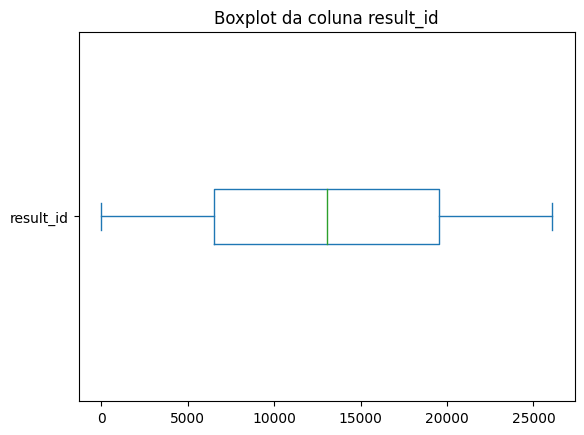

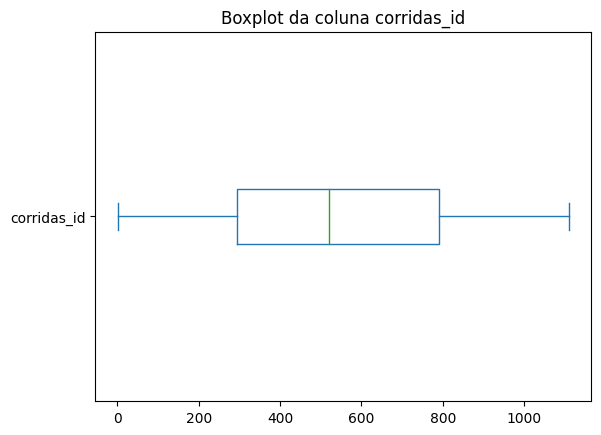

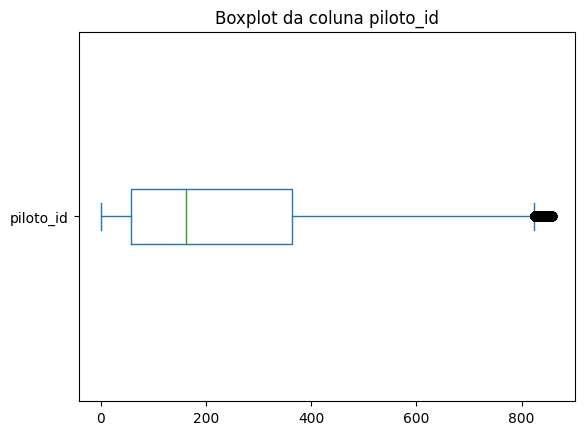

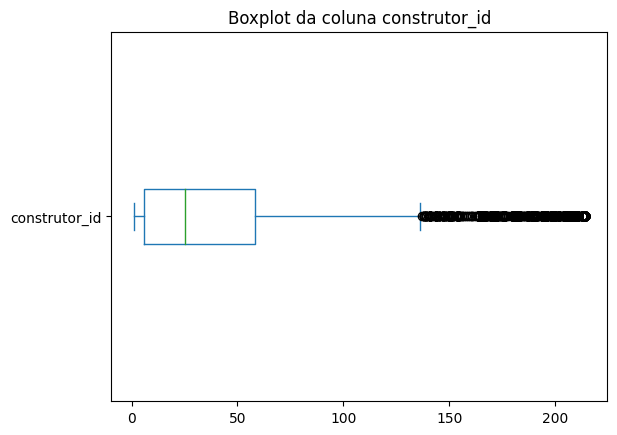

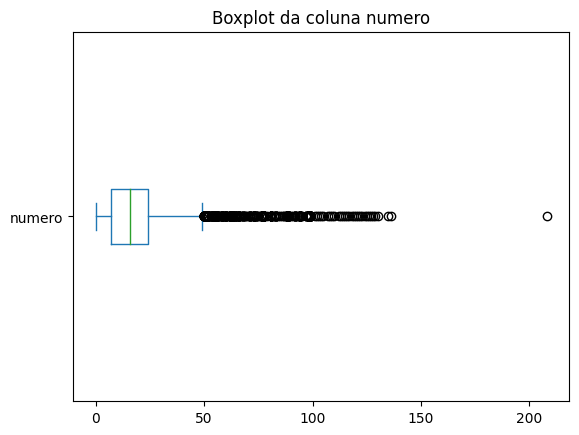

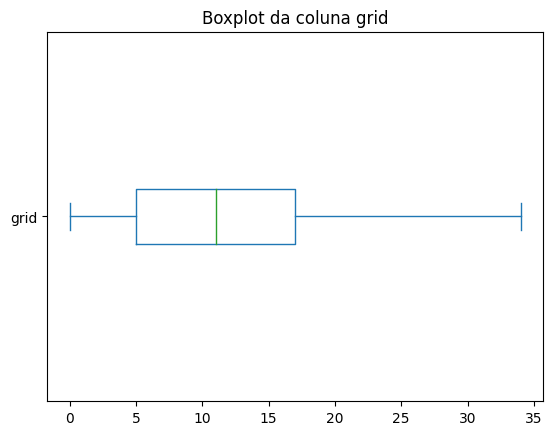

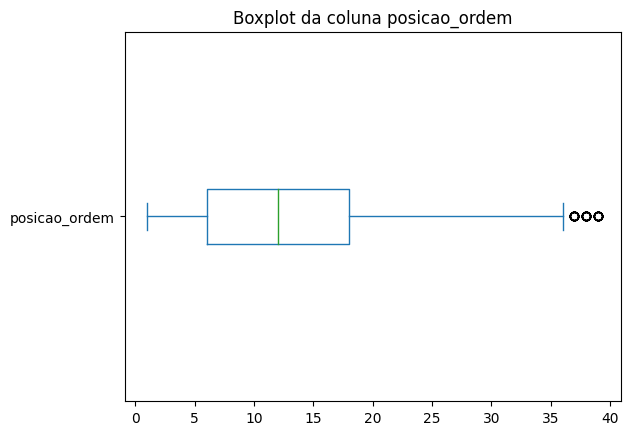

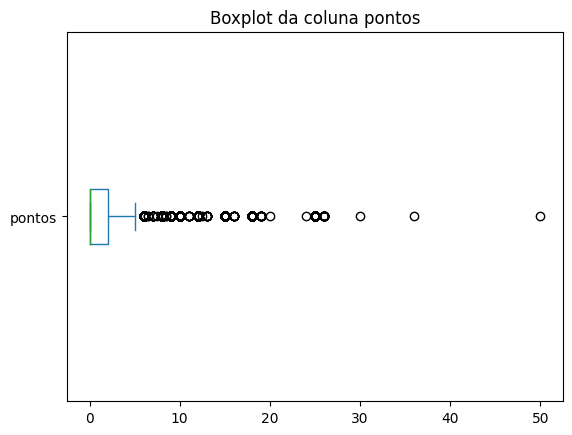

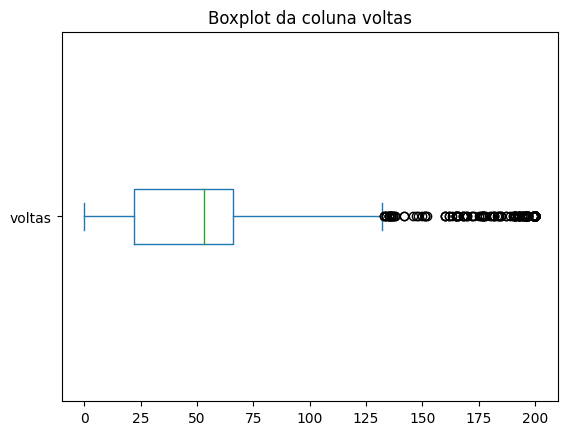

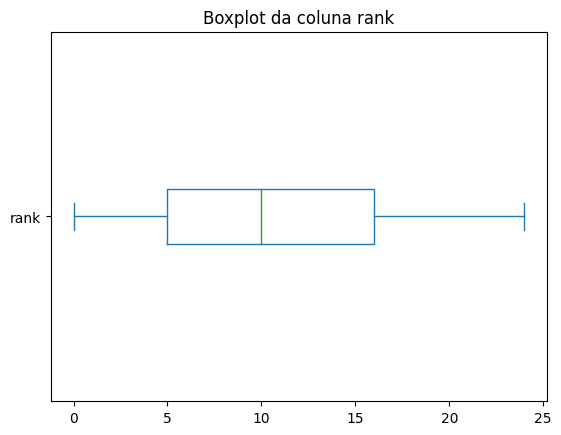

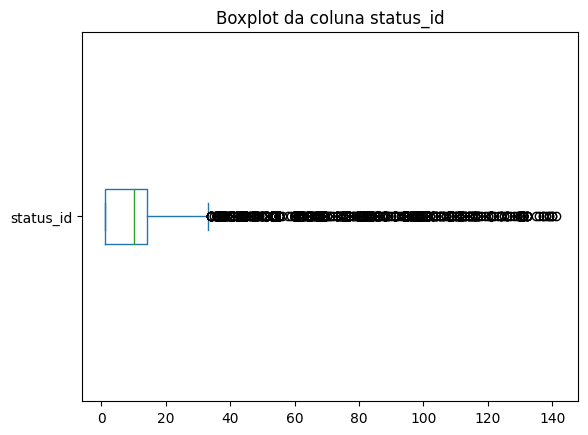

In [256]:
# Crie um boxplot para cada coluna numérica
for coluna in resultados.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    resultados[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

### T/L TABELA QUALIFYING (QUALIFICACAO):

comentários:

#### Alterações pré-determinadas

In [257]:
qualificacao

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


In [258]:
qualificacao.columns = ['qualificacao_id', 'corrida_id', 'piloto_id', 'construtor_id', 'numero', 'posicao', 'q1', 'q2', 'q3']

In [259]:
qualificacao

,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


#### Informações sobre as colunas

In [260]:
print("Colunas: ")
qualificacao.columns

Colunas: 


Index(['qualificacao_id', 'corrida_id', 'piloto_id', 'construtor_id', 'numero',
       'posicao', 'q1', 'q2', 'q3'],
      dtype='object')

In [261]:
print("Descricao: ")
qualificacao.describe()

Descricao: 


,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,4920.076108,589.809985,314.514519,44.783597,18.114519,11.244931
std,2847.637640,421.207023,381.264736,70.843628,17.859565,6.290625
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2455.500000,119.500000,16.000000,4.000000,7.000000,6.000000
50%,4910.000000,856.000000,50.000000,9.000000,14.000000,11.000000
75%,7383.500000,981.000000,818.000000,28.000000,22.000000,17.000000
max,9872.000000,1110.000000,858.000000,214.000000,99.000000,28.000000


In [262]:
print("Informacoes: ")
qualificacao.info()
print("\n")


print("Dimensoes: ")
print(qualificacao.shape)
print("\n")

print("Head:")
qualificacao.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   qualificacao_id  9815 non-null   int64 
 1   corrida_id       9815 non-null   int64 
 2   piloto_id        9815 non-null   int64 
 3   construtor_id    9815 non-null   int64 
 4   numero           9815 non-null   int64 
 5   posicao          9815 non-null   int64 
 6   q1               9807 non-null   object
 7   q2               9651 non-null   object
 8   q3               9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


Dimensoes: 
(9815, 9)


Head:


,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


#### Alterações de type nas colunas e nulls

In [263]:
qualificacao

,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


In [264]:
#Colocando os valores "\n" COMO None
qualificacao = qualificacao.replace('\\N' , np.nan)

In [265]:
# Calcula a contagem de "/N" por coluna
for coluna in qualificacao.columns:
    contagem = qualificacao[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
result_id: 0
corridas_id: 0
piloto_id: 0
construtor_id: 0
numero: 0
grid: 0
posicao: 0
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 18829
milisegundos: 18830
volta_rapida: 18465
rank: 18249
volta_rapida_tempo: 18465
volta_rapida_velocidade: 18465
status_id: 0
qualificacao_id: 0
corrida_id: 0
q1: 0
q2: 0
q3: 0


In [266]:
# Calcula a contagem de "/N" por coluna
for coluna in qualificacao.columns:
    contagem = qualificacao[coluna].astype(str).str.count('NaN').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de NaN por coluna
print("Contagem de 'NaN' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'NaN' em cada coluna:
result_id: 0
corridas_id: 0
piloto_id: 0
construtor_id: 0
numero: 0
grid: 0
posicao: 0
posicao_texto: 0
posicao_ordem: 0
pontos: 0
voltas: 0
tempo: 18829
milisegundos: 18830
volta_rapida: 18465
rank: 18249
volta_rapida_tempo: 18465
volta_rapida_velocidade: 18465
status_id: 0
qualificacao_id: 0
corrida_id: 0
q1: 0
q2: 0
q3: 0


In [267]:
qualificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   qualificacao_id  9815 non-null   int64 
 1   corrida_id       9815 non-null   int64 
 2   piloto_id        9815 non-null   int64 
 3   construtor_id    9815 non-null   int64 
 4   numero           9815 non-null   int64 
 5   posicao          9815 non-null   int64 
 6   q1               9666 non-null   object
 7   q2               5342 non-null   object
 8   q3               3297 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


In [268]:
#Transformando em String porque está inviavel transformar em time em str porque está complicado transformar em time:
qualificacao['q1'] = qualificacao['q1'].astype(pd.StringDtype())
qualificacao['q2'] = qualificacao['q2'].astype(pd.StringDtype())
qualificacao['q3'] = qualificacao['q3'].astype(pd.StringDtype()) 

In [269]:
qualificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   qualificacao_id  9815 non-null   int64 
 1   corrida_id       9815 non-null   int64 
 2   piloto_id        9815 non-null   int64 
 3   construtor_id    9815 non-null   int64 
 4   numero           9815 non-null   int64 
 5   posicao          9815 non-null   int64 
 6   q1               9666 non-null   string
 7   q2               5342 non-null   string
 8   q3               3297 non-null   string
dtypes: int64(6), string(3)
memory usage: 690.2 KB


#### Gráfico e Estátisticas

In [270]:
qualificacao

,qualificacao_id,corrida_id,piloto_id,construtor_id,numero,posicao,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,<NA>,<NA>
9811,9869,1110,855,51,24,17,2:00.832,<NA>,<NA>
9812,9870,1110,858,3,2,18,2:01.535,<NA>,<NA>
9813,9871,1110,817,213,3,19,2:02.159,<NA>,<NA>


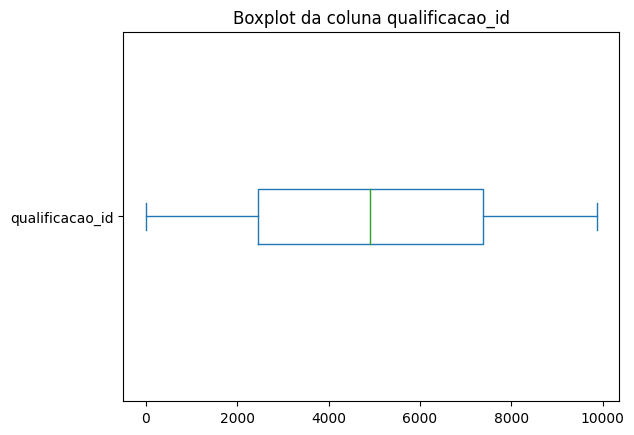

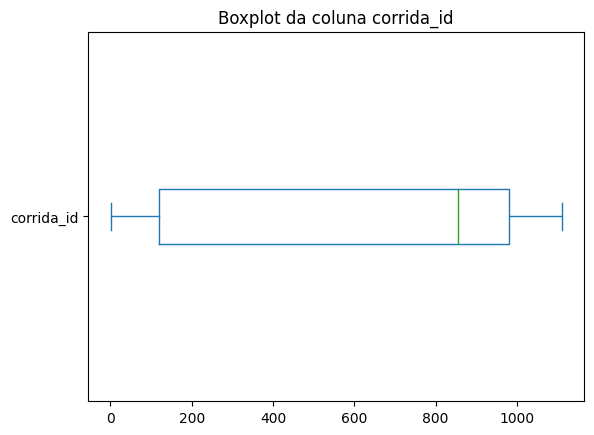

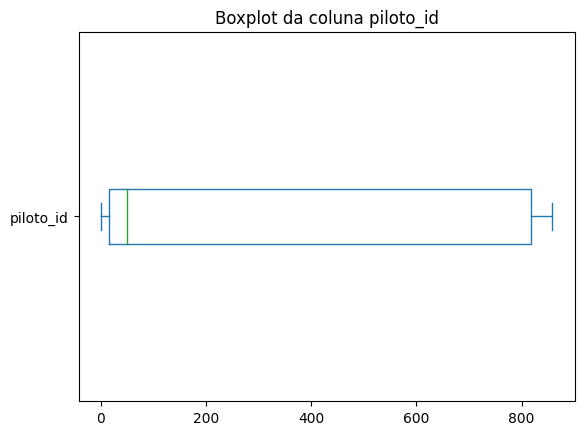

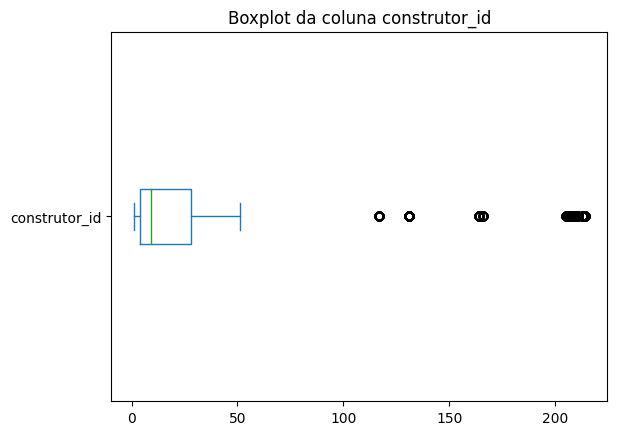

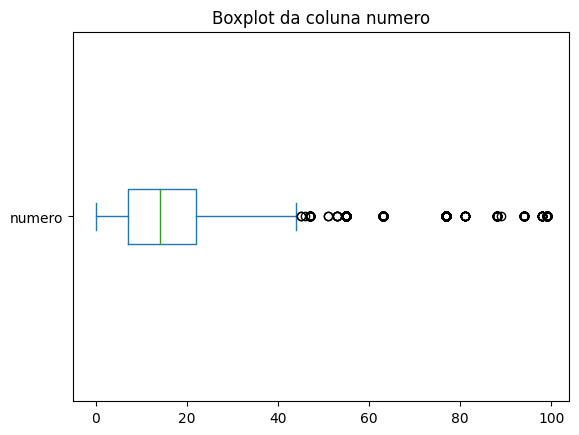

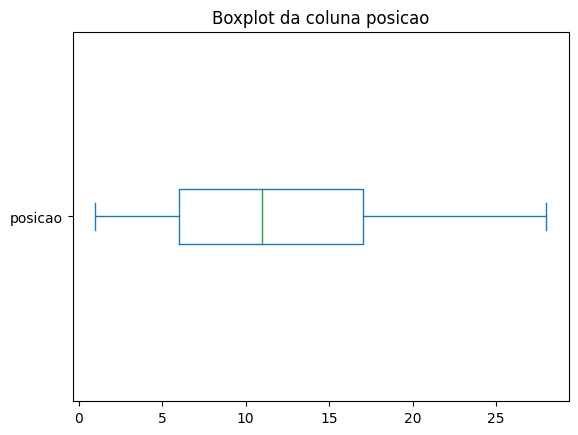

In [271]:
# Crie um boxplot para cada coluna numérica
for coluna in qualificacao.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    qualificacao[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

### T/L tabela RACES (CORRIDAS)

Comentários: Deletado coluna URL e substituido valores ("\N") para NULL com (np.nan).
Talvez limpeza dos "fps" free pratice

#### Alterações pré-determinadas:

In [272]:
#Colocando as colunas em PT_BR
corridas.columns = ['corrida_id', 'ano', 'rodada', 'circuito_id', 'nome', 'data','hora','url','fp1_data','fp1_hora','fp2_data','fp2_hora','fp3_data','fp3_hora','quali_data','quali_hora','sprint_data','sprint_hora']

In [273]:
#Deletando colunas que não precisam

#DROP COLUNA URL
corridas = corridas.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [274]:
#Colocando os valores "\n" COMO None
corridas = corridas.replace('\\N', np.nan)

In [275]:
#Transformando em date, pois está em object
corridas['data'] = pd.to_datetime(corridas['data'])
corridas['fp1_data'] = pd.to_datetime(corridas['fp1_data'])
corridas['fp2_data'] = pd.to_datetime(corridas['fp2_data'])
corridas['fp3_data'] = pd.to_datetime(corridas['fp3_data'])
corridas['quali_data'] = pd.to_datetime(corridas['quali_data'])
corridas['sprint_data'] = pd.to_datetime(corridas['sprint_data'])

In [276]:
#Transformando em String
corridas['nome'] = corridas['nome'].astype(pd.StringDtype())

In [277]:
#Transformando em DateTime
corridas['hora'] = pd.to_datetime(corridas['hora'], format='%H:%M:%S')
corridas['fp1_hora'] = pd.to_datetime(corridas['fp1_hora'], format='%H:%M:%S')
corridas['fp2_hora'] = pd.to_datetime(corridas['fp2_hora'], format='%H:%M:%S')
corridas['fp3_hora'] = pd.to_datetime(corridas['fp3_hora'], format='%H:%M:%S')
corridas['quali_hora'] = pd.to_datetime(corridas['quali_hora'], format='%H:%M:%S')
corridas['sprint_hora'] = pd.to_datetime(corridas['sprint_hora'], format='%H:%M:%S')

In [278]:
#retorna o número de valores ausentes para cada coluna.
corridas.isna().sum()

corrida_id        0
ano               0
rodada            0
circuito_id       0
nome              0
data              0
hora            731
fp1_data       1035
fp1_hora       1057
fp2_data       1035
fp2_hora       1057
fp3_data       1047
fp3_hora       1066
quali_data     1035
quali_hora     1057
sprint_data    1089
sprint_hora    1092
dtype: int64

In [279]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(corridas)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,60.378266


#### Informações Finais

In [280]:
#Informações
corridas.columns
corridas.shape
corridas.dtypes

print("Descricao: ")
corridas.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
corridas.info()
print("\n")


print("Dimensoes: ")
print(corridas.shape)
print("\n")

corridas.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   corrida_id   1101 non-null   int64         
 1   ano          1101 non-null   int64         
 2   rodada       1101 non-null   int64         
 3   circuito_id  1101 non-null   int64         
 4   nome         1101 non-null   string        
 5   data         1101 non-null   datetime64[ns]
 6   hora         370 non-null    datetime64[ns]
 7   fp1_data     66 non-null     datetime64[ns]
 8   fp1_hora     44 non-null     datetime64[ns]
 9   fp2_data     66 non-null     datetime64[ns]
 10  fp2_hora     44 non-null     datetime64[ns]
 11  fp3_data     54 non-null     datetime64[ns]
 12  fp3_hora     35 non-null     datetime64[ns]
 13  quali_data   66 non-null     datetime64[ns]
 14  quali_hora   44 non-null     datetime64[ns]
 15  sprint_data  12 non-null   

,corrida_id,ano,rodada,circuito_id,nome,data,hora,fp1_data,fp1_hora,fp2_data,fp2_hora,fp3_data,fp3_hora,quali_data,quali_hora,sprint_data,sprint_hora
0,1,2009,1,1,Australian Grand Prix,2009-03-29,1900-01-01 06:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,1900-01-01 09:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,1900-01-01 07:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,1900-01-01 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### T/L tabela CIRCUITS (CIRCUITOS):

Comentários: Remoção de URL e tratamento de tipos e nulls.

#### Informações inicias

In [281]:
#Informações 
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


Dimensoes: 
(77, 9)




,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


#### Alterações pré-determinadas:

In [282]:
#Colocando as colunas em PT_BR
circuitos.columns = ['circuito_id', 'circuito_ref', 'nome', 'localizacao', 'pais', 'lat','lng', 'alt','url']

In [283]:
#Deletando colunas que não precisam

#DROP COLUNA URL
circuitos = circuitos.drop('url', axis=1)

#### Alterações de type nas colunas e nulls

In [284]:
#Colocando os valores "\n" COMO NP.NAN (NONE)
circuitos = circuitos.replace('\\N', np.nan)

In [285]:
#Transformando em String
circuitos['nome'] = circuitos['nome'].astype(pd.StringDtype())
circuitos['circuito_ref'] = circuitos['circuito_ref'].astype(pd.StringDtype())
circuitos['pais'] = circuitos['pais'].astype(pd.StringDtype())
circuitos['localizacao'] = circuitos['localizacao'].astype(pd.StringDtype())

In [286]:
#Transformando em INT
circuitos['alt'] = pd.to_numeric(circuitos['alt'])

In [287]:
#retorna o número de valores ausentes para cada coluna.
circuitos.isna().sum()

circuito_id     0
circuito_ref    0
nome            0
localizacao     0
pais            0
lat             0
lng             0
alt             3
dtype: int64

In [288]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Corridas:", perc_na(circuitos)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Corridas:,0.487013


#### Informações finais

In [289]:
#Informações
circuitos.columns
circuitos.shape
circuitos.dtypes

print("Descricao: ")
circuitos.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
circuitos.info()
print("\n")


print("Dimensoes: ")
print(circuitos.shape)
print("\n")

circuitos.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   circuito_id   77 non-null     int64  
 1   circuito_ref  77 non-null     string 
 2   nome          77 non-null     string 
 3   localizacao   77 non-null     string 
 4   pais          77 non-null     string 
 5   lat           77 non-null     float64
 6   lng           77 non-null     float64
 7   alt           74 non-null     float64
dtypes: float64(3), int64(1), string(4)
memory usage: 4.9 KB


Dimensoes: 
(77, 8)




,circuito_id,circuito_ref,nome,localizacao,pais,lat,lng,alt
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0


#### Grafos e Estatisticas

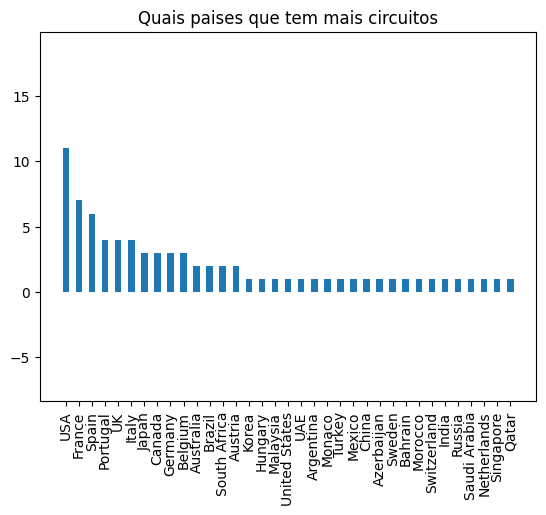

In [290]:
#Distribuição de classificações
count_ratings = circuitos['pais'].value_counts()

# Visualização em um gráfico de pizza
count_ratings.plot(kind='bar')
plt.axis('equal')
plt.title('Quais paises que tem mais circuitos')
plt.show()

### T/L tabela LAPTIMES (tempo_por_volta)

Comentários: Tabela clean, realizado apenas alterações de tipo.

#### Informações Iniciais

In [291]:
#Informações
tempo_por_volta.columns
tempo_por_volta.shape
tempo_por_volta.dtypes

print("Descricao: ")
tempo_por_volta.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
tempo_por_volta.info()
print("\n")


print("Dimensoes: ")
print(tempo_por_volta.shape)
print("\n")

tempo_por_volta.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


Dimensoes: 
(551742, 6)




,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


#### Alterações pré-determinadas:

In [292]:
#Colocando as colunas em PT_BR
tempo_por_volta.columns = ['corrida_id', 'piloto_id', 'volta', 'posicao', 'tempo', 'milisegundos']

#### Alterações de type nas colunas e nulls

In [293]:
#Transformando object (coluna: TEMPO) em datatype #Esta demorando muito para rodar.

# def converter_tempo(tempo):
#     try:
#         return pd.to_datetime(tempo, format='%H:%M:%S.%f')
#     except ValueError:
#         try:
#             return pd.to_datetime(tempo, format='%M:%S.%f')
#         except ValueError:
#             raise ValueError("Formato de tempo não reconhecido: {}".format(tempo))

# # Aplicando a função de conversão
# tempo_por_volta['tempo'] = tempo_por_volta['tempo'].apply(converter_tempo)

# # Formatando para MM:SS.SSS
# tempo_por_volta['tempo'] = tempo_por_volta['tempo'].dt.strftime('%H:%M:%S.%f').str[:-3]
# tempo_por_volta['tempo'] = tempo_por_volta['tempo'].apply(converter_tempo)

In [294]:
#retorna o número de valores ausentes para cada coluna.
tempo_por_volta.isna().sum()

corrida_id      0
piloto_id       0
volta           0
posicao         0
tempo           0
milisegundos    0
dtype: int64

In [295]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Tempo_por_volta:", perc_na(tempo_por_volta)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Tempo_por_volta:,0.0


#### Informações finais

In [296]:
#Informações
tempo_por_volta.columns
tempo_por_volta.shape
tempo_por_volta.dtypes

print("Descricao: ")
tempo_por_volta.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
tempo_por_volta.info()
print("\n")


print("Dimensoes: ")
print(tempo_por_volta.shape)
print("\n")

tempo_por_volta.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   corrida_id    551742 non-null  int64 
 1   piloto_id     551742 non-null  int64 
 2   volta         551742 non-null  int64 
 3   posicao       551742 non-null  int64 
 4   tempo         551742 non-null  object
 5   milisegundos  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


Dimensoes: 
(551742, 6)




,corrida_id,piloto_id,volta,posicao,tempo,milisegundos
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


#### Grafos e estatistica

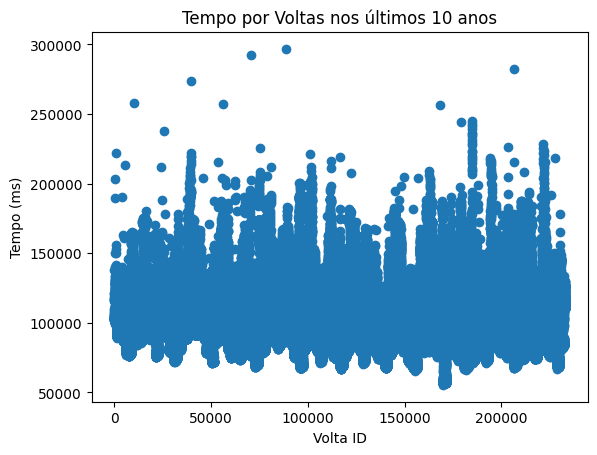

In [297]:
ano = 2023

anos_filtrados = corridas[corridas.ano >= ano - 10]

#Filter down to last ten years of data
voltas_filtradas = tempo_por_volta[tempo_por_volta.corrida_id.isin(anos_filtrados.corrida_id)]
# Filter out extreme outliers
voltas_filtradas = voltas_filtradas[voltas_filtradas.milisegundos <= 300000]

plot_index = [x for x in range(len(voltas_filtradas.milisegundos))]


fig, ax = plt.subplots()

ax.set_xlabel('Volta ID')
ax.set_ylabel('Tempo (ms)')
ax.set_title('Tempo por Voltas nos últimos 10 anos')



plt.scatter(x=plot_index, y=voltas_filtradas.milisegundos)

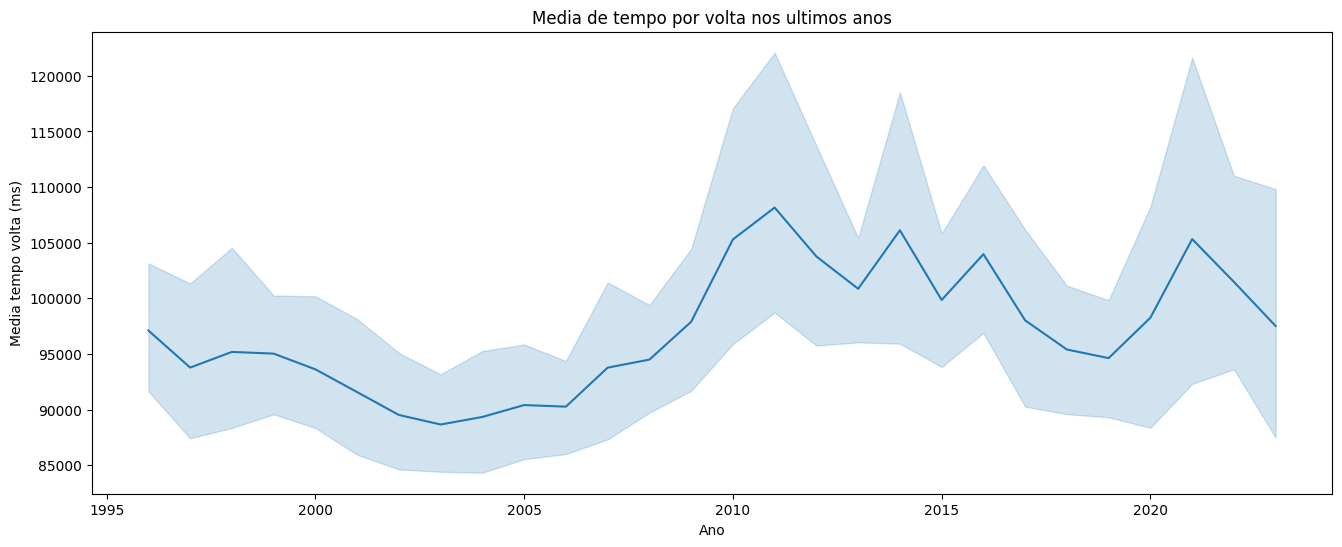

In [298]:
data_corridas_volta = pd.merge(corridas, tempo_por_volta, on='corrida_id')
data_corridas_volta = pd.merge(data_corridas_volta, pilotos, on='piloto_id')
media_tempo_volta = data_corridas_volta.groupby(['ano', 'corrida_id'])['milisegundos'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='ano', y='milisegundos', data=media_tempo_volta)
plt.xlabel('Ano')
plt.ylabel('Media tempo volta (ms)')
plt.title('Media de tempo por volta nos ultimos anos')
plt.show()

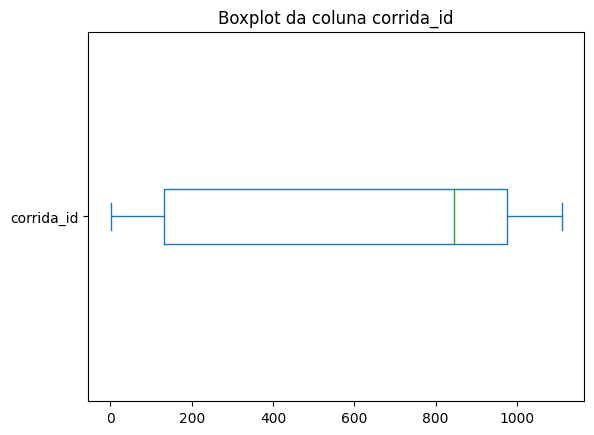

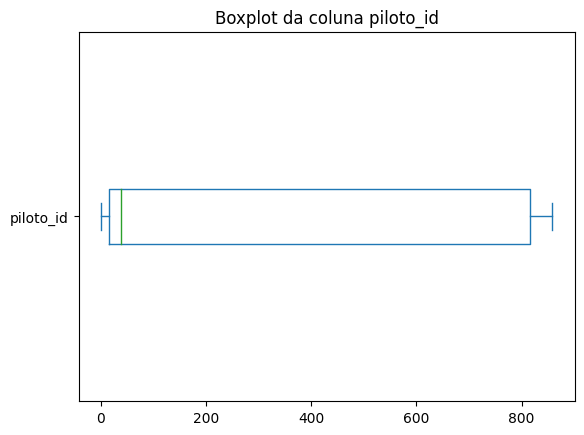

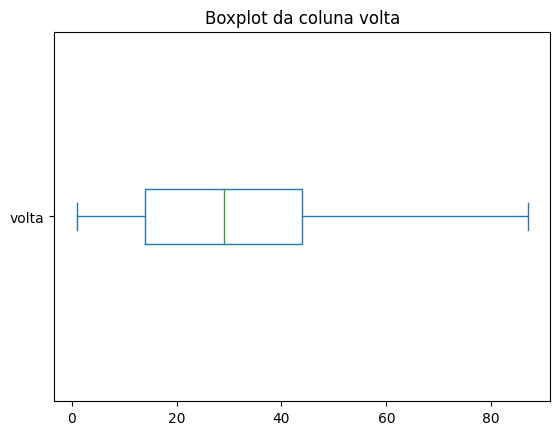

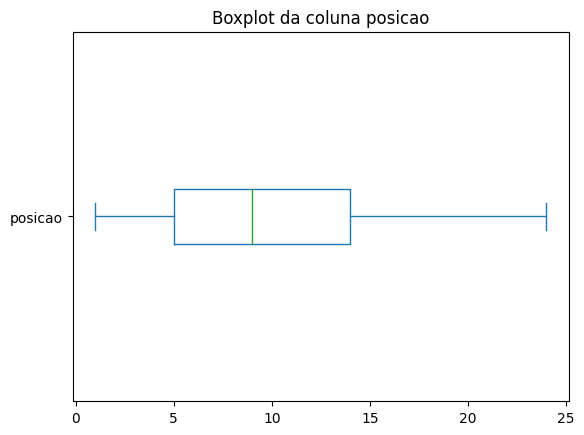

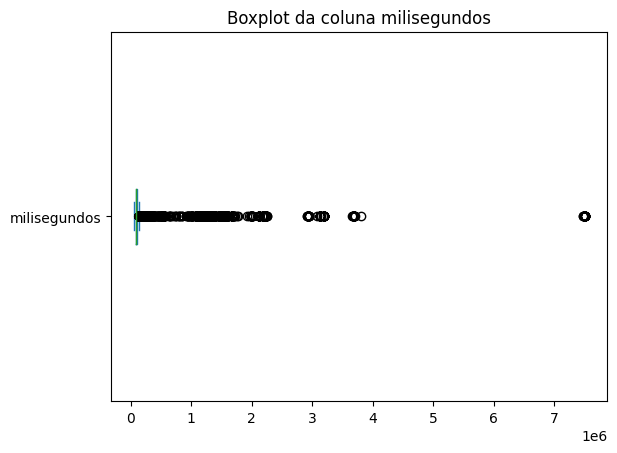

In [299]:
# Crie um boxplot para cada coluna numérica
for coluna in tempo_por_volta.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    tempo_por_volta[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

### T/L tabela CONSTRUCTOR RESULTS (CONSTRUTOR_RESULTADOS):

Comentários: Tabela clean, talvez limpeza no status, pois tem muitos nulls.

#### Informações iniciais

In [300]:
#Informações
construtor_resultados.columns
construtor_resultados.shape
construtor_resultados.dtypes

print("Descricao: ")
construtor_resultados.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtor_resultados.shape)
print("\n")

construtor_resultados.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   construtores_resultados_id  12290 non-null  int64  
 1   race_id                     12290 non-null  int64  
 2   construtores_id             12290 non-null  int64  
 3   pontos                      12290 non-null  float64
 4   status                      17 non-null     string 
dtypes: float64(1), int64(3), string(1)
memory usage: 480.2 KB


Dimensoes: 
(12290, 5)




,construtores_resultados_id,race_id,construtores_id,pontos,status
0,1,18,1,14.0,<NA>
1,2,18,2,8.0,<NA>
2,3,18,3,9.0,<NA>
3,4,18,4,5.0,<NA>
4,5,18,5,2.0,<NA>


#### Alterações pré-determinadas:

In [301]:
construtor_resultados.columns = ['construtor_resultados_id', 'corrida_id', 'construtor_id', 'pontos', 'status']


#### Alterações de type nas colunas e nulls

In [302]:
#Colocando os valores "\n" COMO None
construtor_resultados = construtor_resultados.replace('\\N', np.nan)

#Transformando em String
construtor_resultados['status'] = construtor_resultados['status'].astype(pd.StringDtype())

In [303]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtor_resultados.columns:
    contagem = construtor_resultados[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtor_resultados_id: 0
corrida_id: 0
construtor_id: 0
pontos: 0
status: 12273


#### Informações finais

In [304]:
#Informações
construtor_resultados.columns
construtor_resultados.shape
construtor_resultados.dtypes

print("Descricao: ")
construtor_resultados.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_resultados.info()
print("\n")


print("Dimensoes: ")
print(construtor_resultados.shape)
print("\n")

construtor_resultados.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   construtor_resultados_id  12290 non-null  int64  
 1   corrida_id                12290 non-null  int64  
 2   construtor_id             12290 non-null  int64  
 3   pontos                    12290 non-null  float64
 4   status                    17 non-null     string 
dtypes: float64(1), int64(3), string(1)
memory usage: 480.2 KB


Dimensoes: 
(12290, 5)




,construtor_resultados_id,corrida_id,construtor_id,pontos,status
0,1,18,1,14.0,<NA>
1,2,18,2,8.0,<NA>
2,3,18,3,9.0,<NA>
3,4,18,4,5.0,<NA>
4,5,18,5,2.0,<NA>


#### Grafos e estatisticas

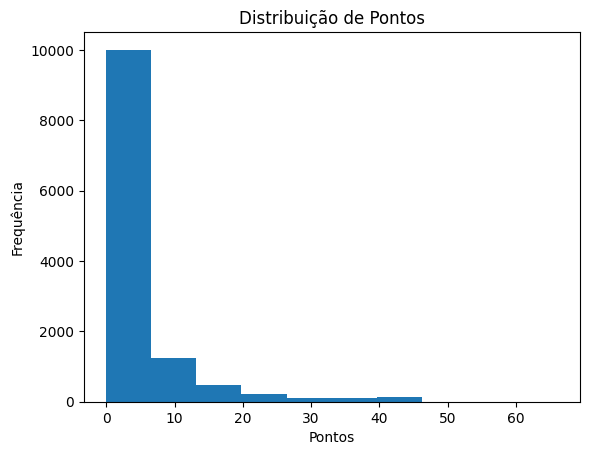

In [305]:
# Histograma das avaliações dos usuários
construtor_resultados['pontos'].plot(kind='hist')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.title('Distribuição de Pontos')
plt.show()

### T/L tabela CONSTRUCTOR_STANDINGS (CONSTUTOR_CLASSIFICACOES)

Comentário: Possui uma coluna "poiscoes_texto", que seria a posicao porem em string. Possivel drop.

#### Informações inicias:

In [306]:
#Informações
construtor_classificacoes.columns
construtor_classificacoes.shape
construtor_classificacoes.dtypes

print("Descricao: ")
construtor_classificacoes.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(construtor_classificacoes.shape)
print("\n")

construtor_classificacoes.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


Dimensoes: 
(13051, 7)




,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


#### Alterações pré-determinadas:


In [307]:
#Colocando as colunas em PT_BR
construtor_classificacoes.columns = ['construtor_classif_id', 'corrida_id', 'construtor_id', 'pontos', 'posicao', 'posicao_texto','vitorias']

#### Alterações de type nas colunas e nulls

In [308]:
#Transformando em String
construtor_classificacoes['posicao_texto'] = construtor_classificacoes['posicao_texto'].astype(pd.StringDtype())

In [309]:
#retorna o número de valores ausentes para cada coluna.
construtor_classificacoes.isna().sum()

construtor_classif_id    0
corrida_id               0
construtor_id            0
pontos                   0
posicao                  0
posicao_texto            0
vitorias                 0
dtype: int64

In [310]:
#Calcula o percentual de valores ausentes
def perc_na(df: pd.DataFrame) -> float:
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Construtor_Classificacoes:", perc_na(construtor_classificacoes)]
], columns=["Dataframe", "% de valores ausentes"])

,Dataframe,% de valores ausentes
0,Construtor_Classificacoes:,0.0


#### Informações finais

In [311]:
#Informações
construtor_classificacoes.columns
construtor_classificacoes.shape
construtor_classificacoes.dtypes

print("Descricao: ")
construtor_classificacoes.describe()
print("\n")

# Obtendo informações sobre as colunas
print("Informacoes: ")
construtor_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(construtor_classificacoes.shape)
print("\n")

construtor_classificacoes.head(5)

Descricao: 


Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   construtor_classif_id  13051 non-null  int64  
 1   corrida_id             13051 non-null  int64  
 2   construtor_id          13051 non-null  int64  
 3   pontos                 13051 non-null  float64
 4   posicao                13051 non-null  int64  
 5   posicao_texto          13051 non-null  string 
 6   vitorias               13051 non-null  int64  
dtypes: float64(1), int64(5), string(1)
memory usage: 713.9 KB


Dimensoes: 
(13051, 7)




,construtor_classif_id,corrida_id,construtor_id,pontos,posicao,posicao_texto,vitorias
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [312]:
contagem_contrutores = construtor_classificacoes['construtor_id'].value_counts().sort_index()


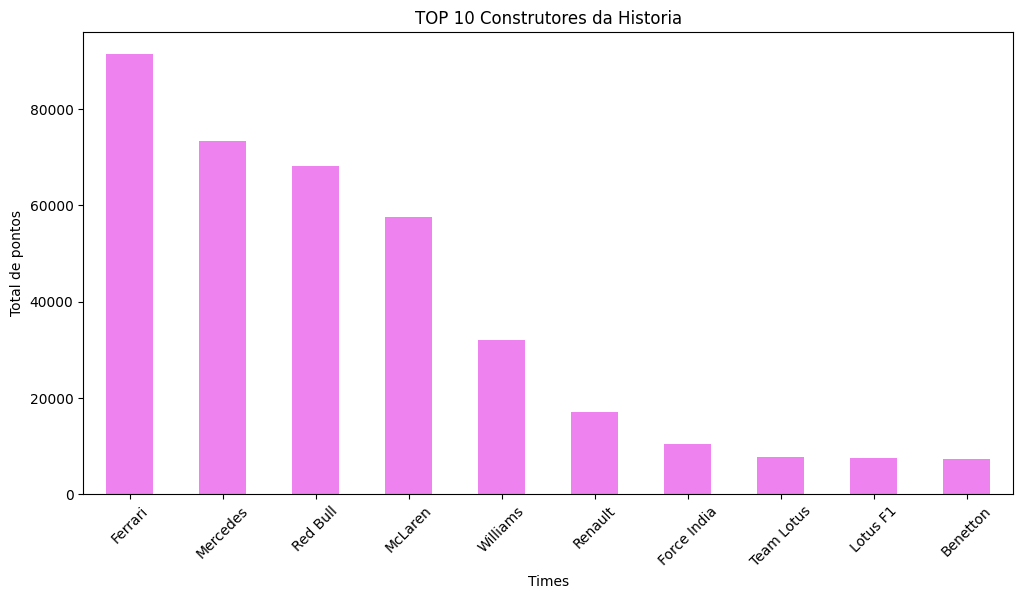

In [313]:
melhores_construtores = pd.merge(construtor_classificacoes, construtores, on='construtor_id')
melhores_construtores = melhores_construtores.groupby('nome')['pontos'].sum()
melhores_construtores = melhores_construtores.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
melhores_construtores.plot(kind='bar', color='violet')
plt.xlabel('Times')
plt.ylabel('Total de pontos')
plt.title('TOP 10 Construtores da Historia')
plt.xticks(rotation=45)
plt.show()

## Exportação de dados

In [314]:
## Exportação de dados

# Tabelas a serem tratadas, limpas e análisadas serão: pilotos, pilotos_classificacoes, construtores, construtor_resultados, sprint_resultados, parada_boxes
# pilotos.to_csv('./bases_br/pilotos.csv', index=False)
# piloto_classificacoes.to_csv('./bases_br/piloto_classificacoes.csv', index=False)
# construtores.to_csv('./bases_br/construtores.csv', index=False)
# construtor_resultados.to_csv('./bases_br/construtor_resultados.csv', index=False)
# sprint_resultados.to_csv('./bases_br/sprint_resultados.csv', index=False)
# parada_boxes.to_csv('./bases_br/parada_boxes.csv', index=False)
#corridas.to_csv('./bases_br/corridas.csv', index=False)
#circuitos.to_csv('./bases_br/circuitos.csv', index=False)
#tempo_por_volta.to_csv('./bases_br/tempo_por_volta.csv', index=False)
#construtor_resultados.to_csv('./bases_br/construtor_resultados.csv', index=False)
#construtor_classificacoes.to_csv('./bases_br/construtor_classificacoes.csv', index=False)